Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Загрузка датасетов

In [3]:
X_bp = pd.read_excel('/content/sample_data/X_bp.xlsx', index_col=0)
X_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [4]:
X_bp.shape

(1023, 10)

In [5]:
X_nup = pd.read_excel('/content/sample_data/X_nup.xlsx', index_col=0)
X_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


In [6]:
X_nup.shape

(1040, 3)

Объединение датасетов

In [7]:
X_set = X_bp.join(X_nup, how='inner')
X_set.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


Анализ датасета

In [8]:
X_set.shape

(1023, 13)

In [9]:
X_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [10]:
#количество уникальных значений
X_set.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [11]:
#проверка на наличие дубликатов
X_set.duplicated().sum()

0

In [12]:
X_set.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


<Axes: >

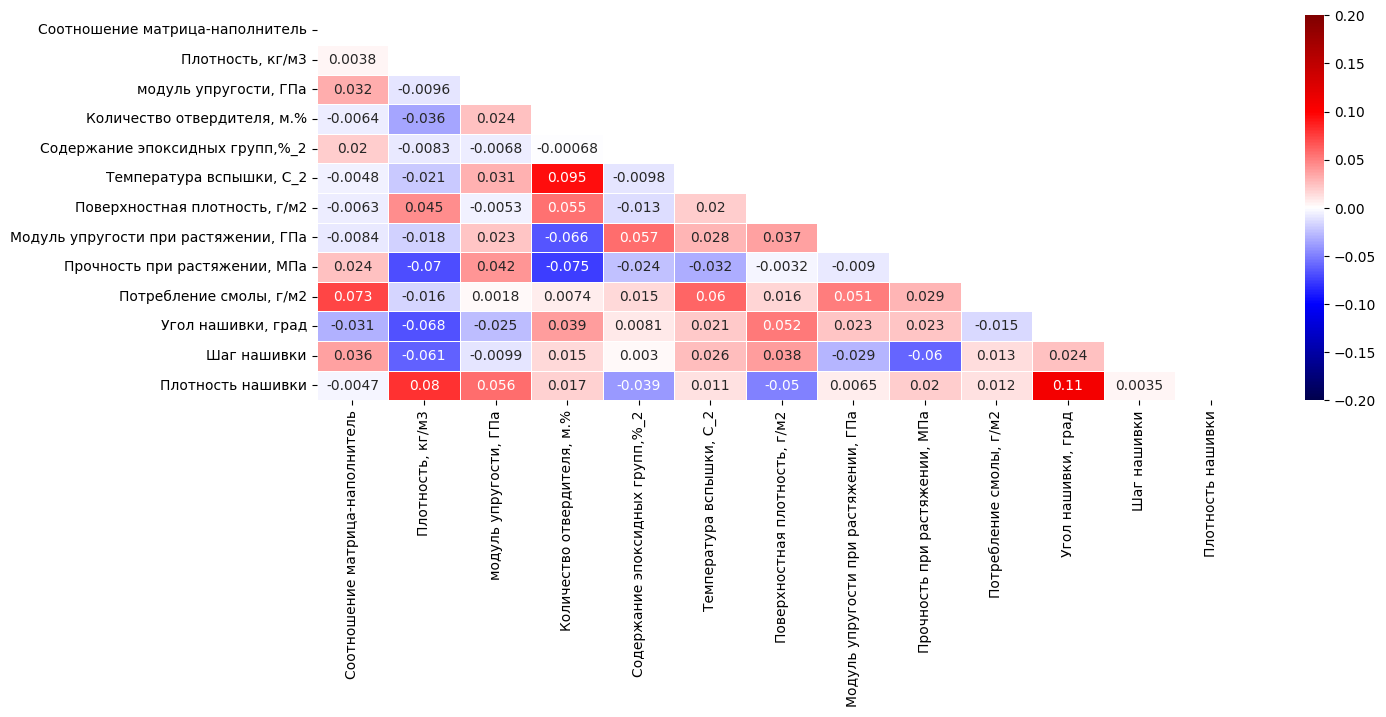

In [13]:
#определение зависимостей
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(X_set.corr())
sns.heatmap(X_set.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

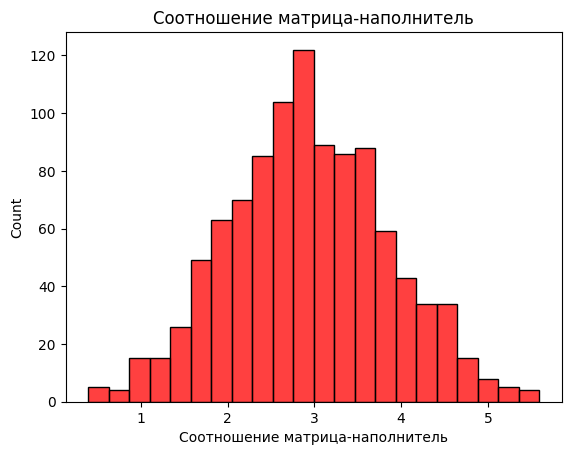

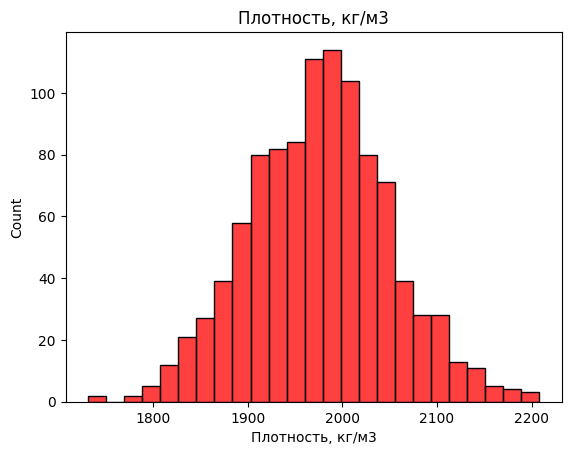

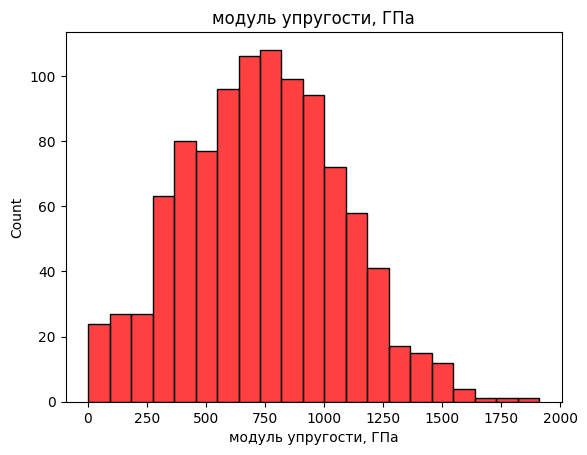

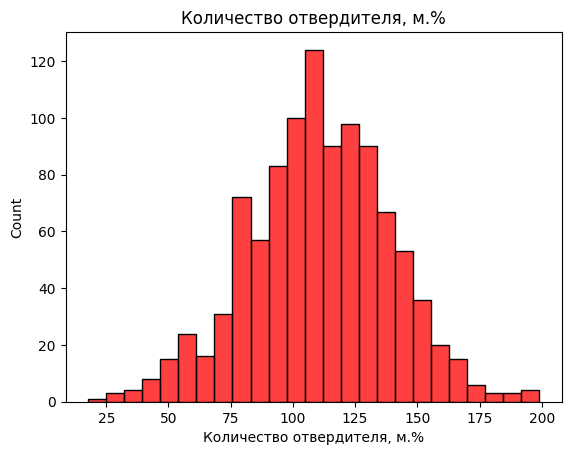

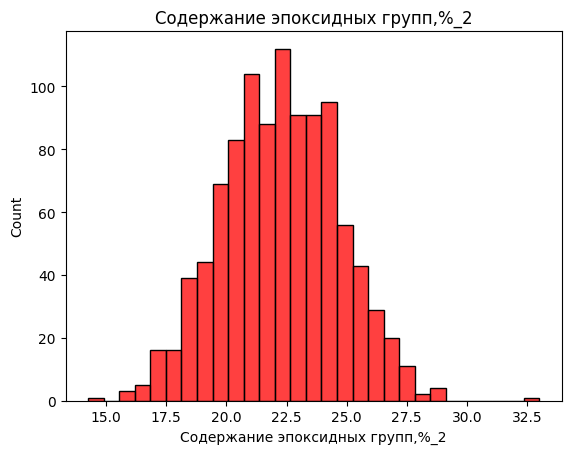

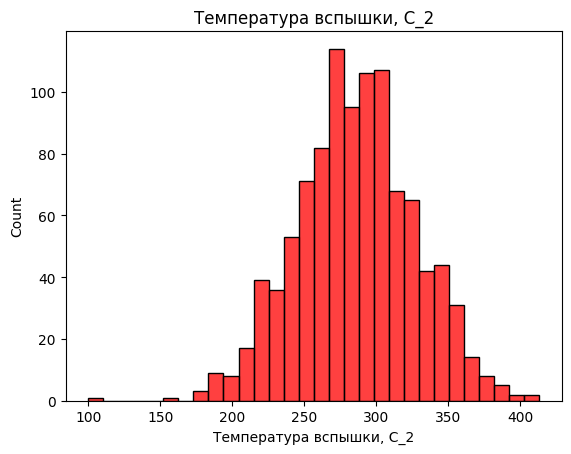

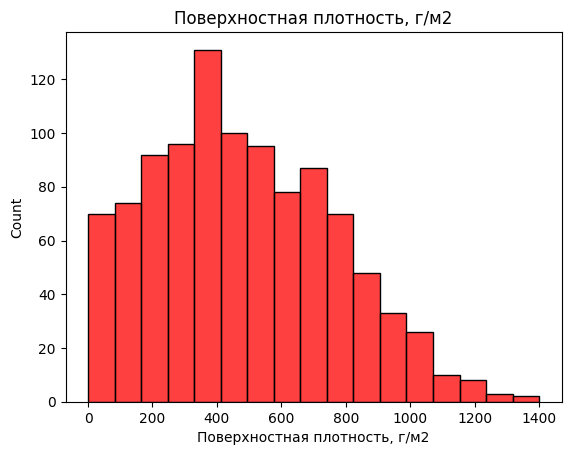

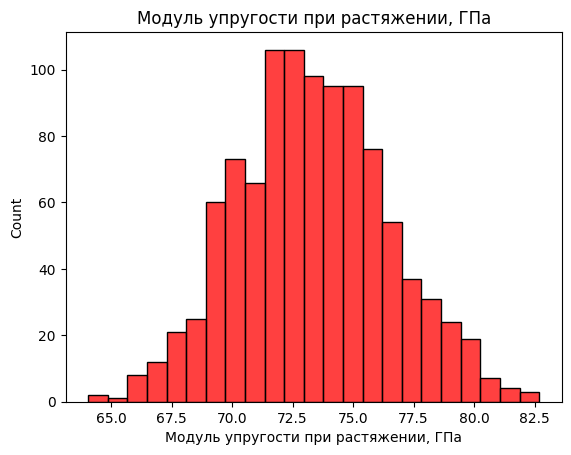

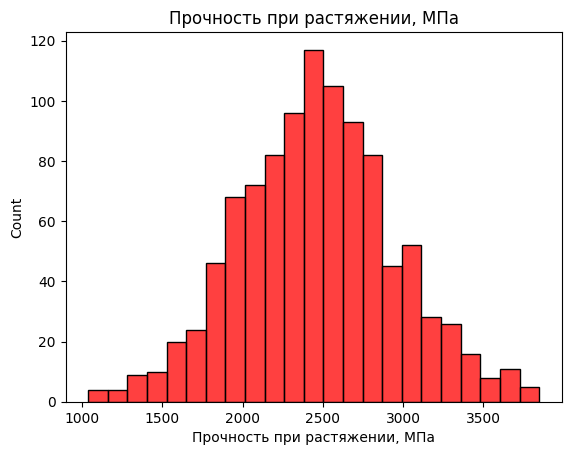

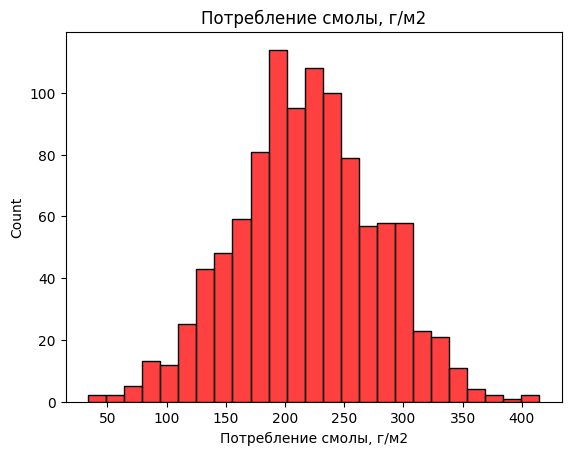

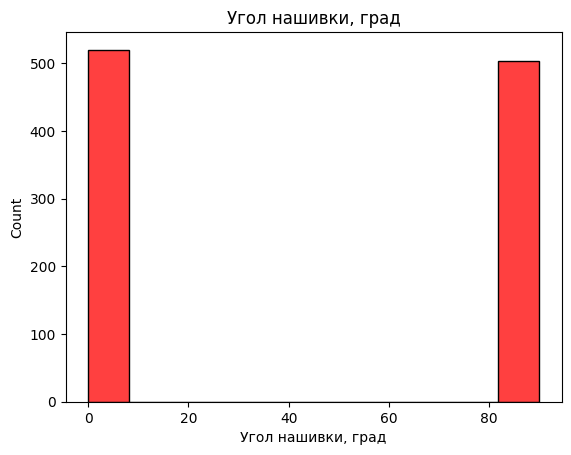

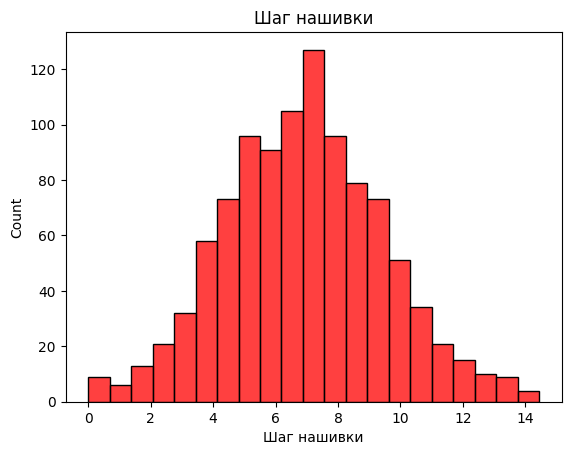

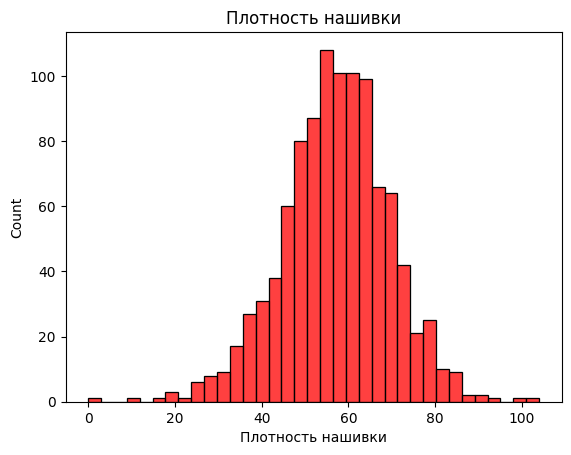

In [14]:
#распределения показателей в каждом столбце:
for column in X_set.columns:
	plt.figure()
	sns.histplot(X_set[column], color='r')
	plt.title(column)

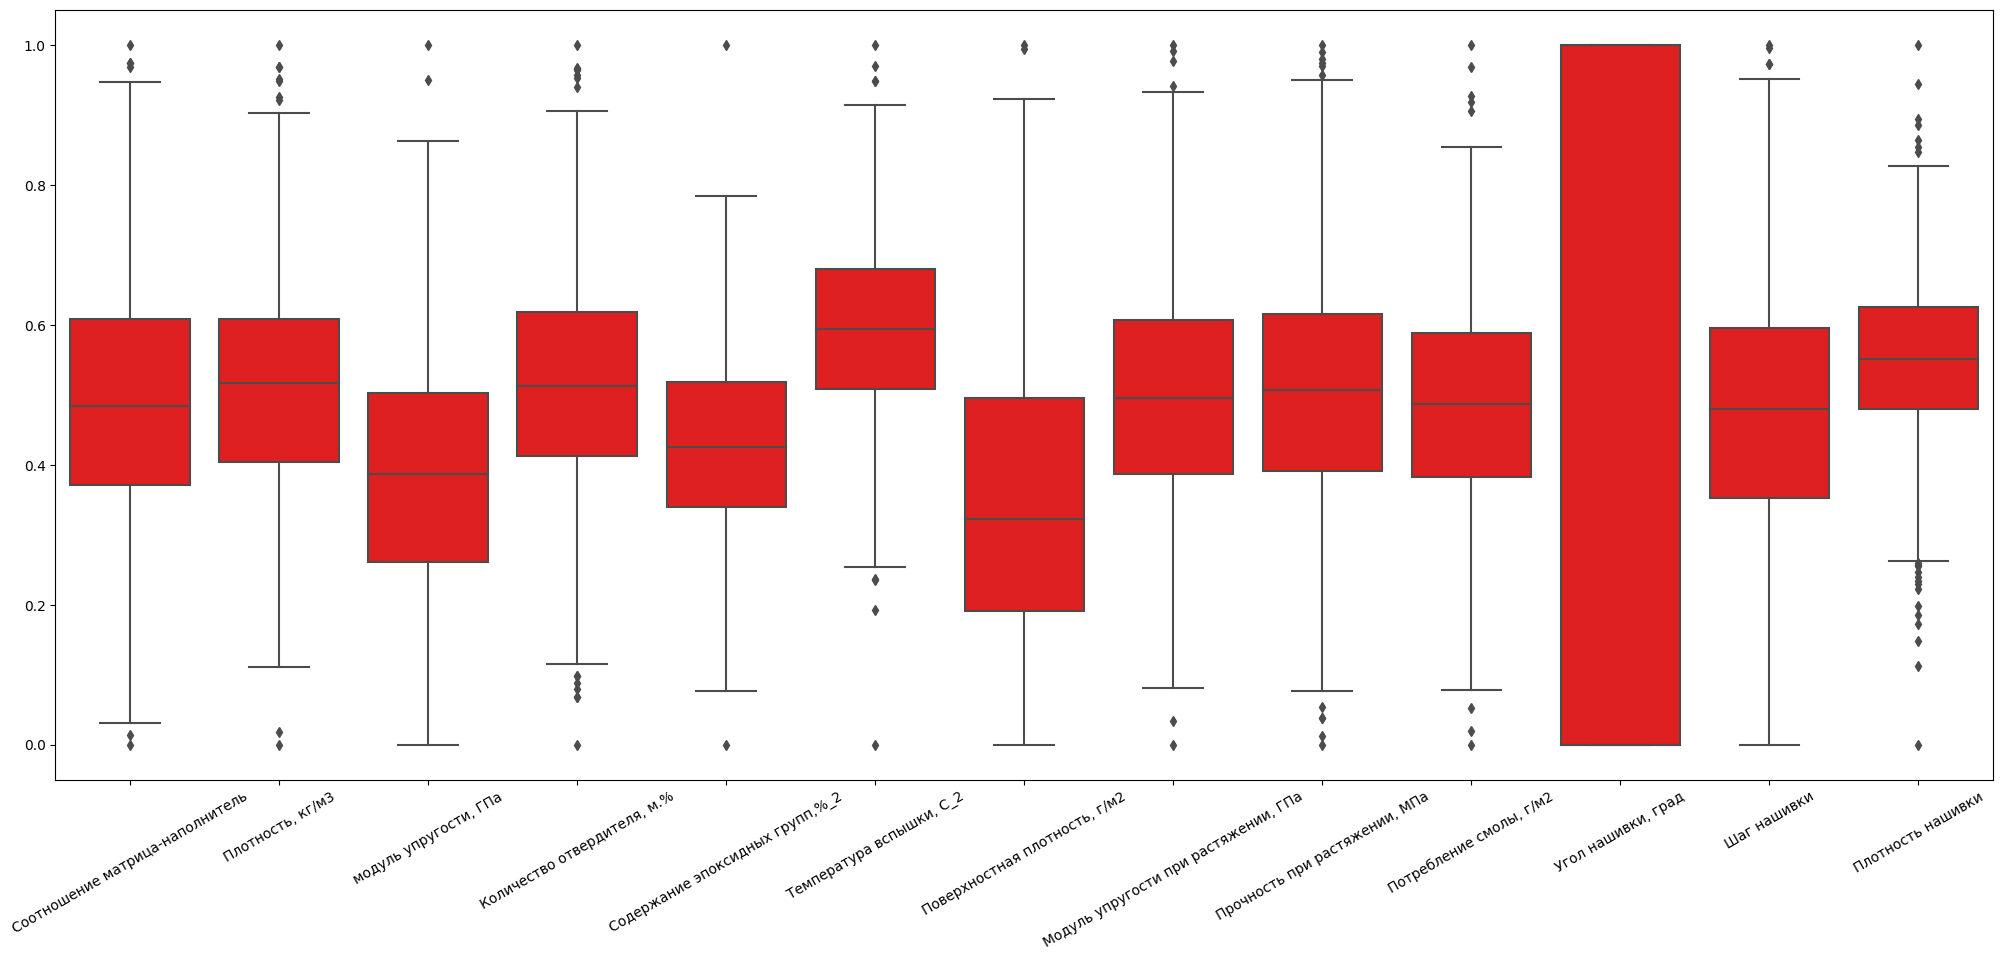

In [21]:
#boxplot
MinMaxScaler = preprocessing.MinMaxScaler()
col = X_set.columns
X_set_for_visual = pd.DataFrame(MinMaxScaler.fit_transform(X_set), columns = col) #датасет создан для удобной визуализации
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.boxplot(data = X_set_for_visual, orient='v', color='r', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

In [22]:
#создание переменной со списком всех параметров, в которых есть выбросы
X_set.columns
column_list_outliers = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [23]:
for i in column_list_outliers:
    q75, q25 = np.percentile(X_set.loc[:,i],[75, 25])
    intr_qr = q75 - q25
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)
    X_set.loc[X_set[i] < min,i] = np.nan
    X_set.loc[X_set[i] > max,i] = np.nan

In [24]:
X_set1 = X_set

In [25]:
X_set_drop = X_set1.dropna(axis=0, how='any')

In [26]:
X_set_drop.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [27]:
X_set_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    int64  
 11  Шаг нашивки       

In [28]:
X_set_drop.shape

(936, 13)

In [29]:
#после удаления выбросов датасет уменьшен на 97 значений (это 9,5% от исходного датасета)

<Axes: >

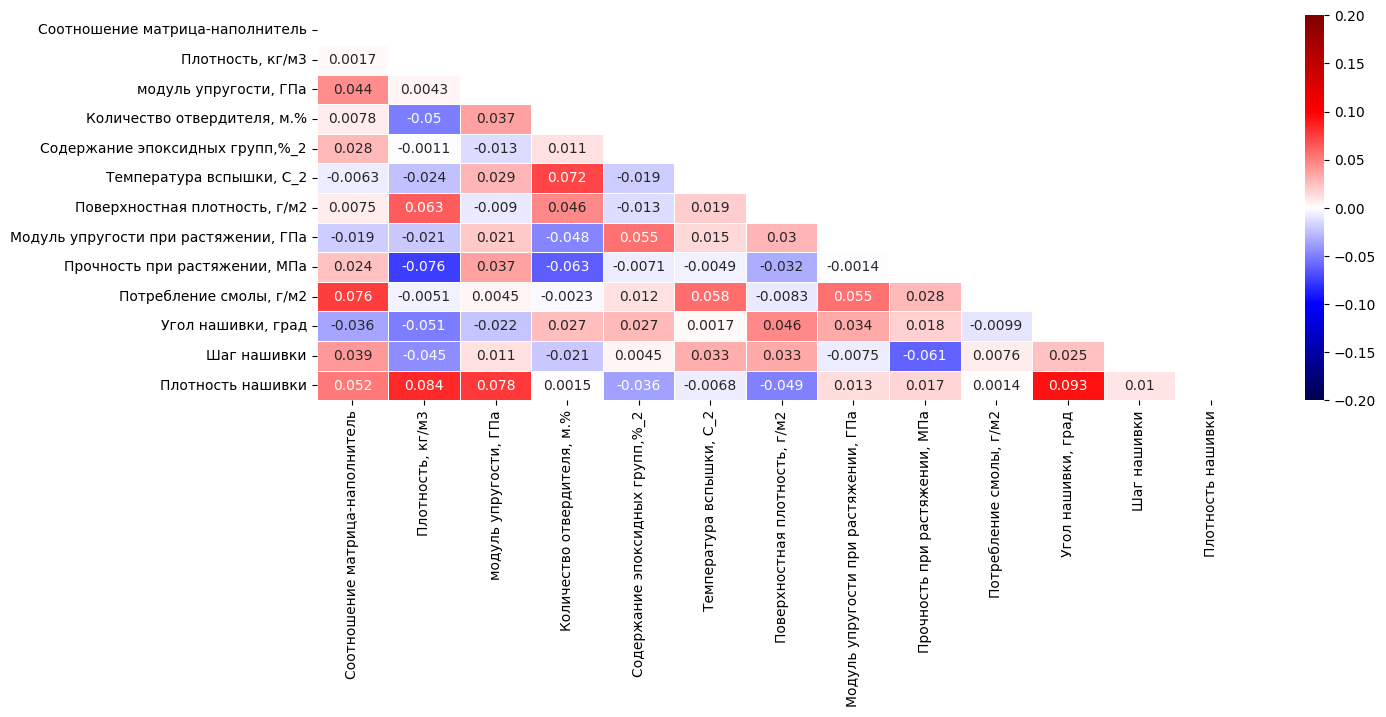

In [30]:
#определение зависимостей после удаления выбросов
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(X_set_drop.corr())
sns.heatmap(X_set_drop.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

In [32]:
X_set_mean = X_set.fillna(X_set.mean())

In [33]:
X_set_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [34]:
X_set_mean.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,110.558048,22.267857,285.949508,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.000000,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.900000,22.241680,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.000000,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.860000,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


<Axes: >

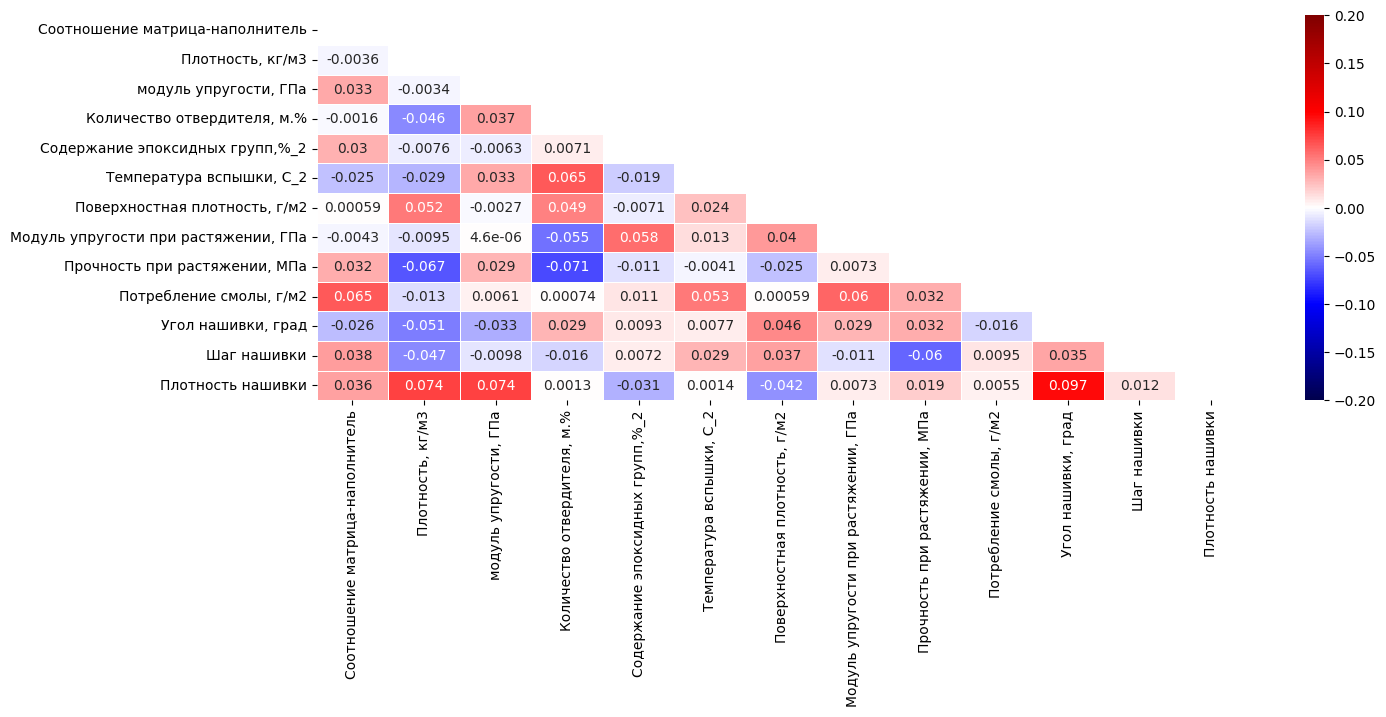

In [35]:
#определение зависимостей после удаления выбросов
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(X_set_mean.corr())
sns.heatmap(X_set_mean.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)